In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("metadata.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.shape

(785268, 19)

In [4]:
#Top 10 journal publications
n = 10
# dataframe['name'].value_counts()[:n].index.tolist()
df['journal'].value_counts()[:n]

PLoS One                                        7601
bioRxiv                                         6860
BMJ                                             6039
Int J Environ Res Public Health                 4360
Sci Rep                                         4203
Nature                                          2922
Lancet                                          2866
Cureus                                          2675
Viruses                                         2460
Int. j. environ. res. public health (Online)    2391
Name: journal, dtype: int64

In [5]:
#Randomly spit data by Quarter - Sample Quarter the data 
dfSample = df.sample(frac = 0.25)

dfSample.shape

(196317, 19)

In [8]:
dfSample = dfSample.convert_dtypes()
dfSample.dtypes

cord_uid            string
sha                 string
source_x            string
title               string
doi                 string
pmcid               string
pubmed_id           object
license             string
abstract            string
publish_time        string
authors             string
journal             string
mag_id               Int64
who_covidence_id    string
arxiv_id            object
pdf_json_files      string
pmc_json_files      string
url                 string
s2_id                Int64
dtype: object

In [9]:
#Visualizing top 10 journals in bar chart
n = 10
dfSample['journal'].value_counts()[:n]

PLoS One                                        1922
bioRxiv                                         1754
BMJ                                             1462
Int J Environ Res Public Health                 1074
Sci Rep                                         1030
Nature                                           731
Lancet                                           711
Cureus                                           675
Viruses                                          592
Int. j. environ. res. public health (Online)     586
Name: journal, dtype: Int64

<AxesSubplot:>

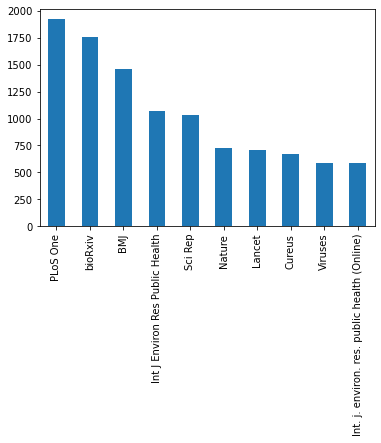

In [10]:
#Visualizing top 10 journals in bar chart
n = 10
dfSample['journal'].value_counts()[:n].plot(kind="bar")

In [11]:
#Split Publication Source
dfSample[['1st Source', 'other Sources']] = dfSample['source_x'].str.split(';',n=1, expand=True)
dfSample.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,1st Source,other Sources
563447,gv3m3u9d,2e8bf44bd30923d69c67cd3b3f627c8cf138e18c,Medline; PMC,Clinical and virological characteristics of ho...,10.1007/s15010-021-01594-w,PMC8061715,33890243.0,cc-by,PURPOSE: Adequate patient allocation is pivota...,2021-04-22,...,Infection,<NA>,<NA>,NaN,document_parses/pdf_json/2e8bf44bd30923d69c67c...,document_parses/pmc_json/PMC8061715.xml.json,https://doi.org/10.1007/s15010-021-01594-w; ht...,233355606,Medline,PMC
133534,63m4qw7p,<NA>,Medline,The growth characteristics of Bacillus cereus ...,10.4315/jfp-20-196,<NA>,32977335.0,unk,Sake (Japanese rice wine) has been recognized ...,2020-09-25,...,Journal of food protection,<NA>,<NA>,NaN,<NA>,<NA>,https://doi.org/10.4315/jfp-20-196; https://ww...,221937719,Medline,<NA>
141039,tz8gzdar,<NA>,Medline,Cerebrovascular autoregulation after rewarming...,10.1152/japplphysiol.00238.2013,<NA>,24009008.0,unk,"After hypoxic brain injury, maintaining blood ...",2013,...,Journal of applied physiology,<NA>,<NA>,NaN,<NA>,<NA>,https://doi.org/10.1152/japplphysiol.00238.201...,9098421,Medline,<NA>
454431,nkzzap55,<NA>,WHO,Superior Mesenteric Artery Thrombosis in COVID...,<NA>,<NA>,NaN,unk,The COVID-19 disease caused by novel coronavir...,2020,...,Indian J Surg,<NA>,#888302,NaN,<NA>,<NA>,<NA>,224784105,WHO,<NA>
167444,itc5kqud,0c5bfa3f99bce43fcacdb8dc58bbe5ea9da1166c,MedRxiv,Self-assessment of COVID-19 vaccination effica...,10.1101/2021.06.27.21258591,<NA>,NaN,medrxiv,1. A highly specific lateral flow test kit for...,2021-07-02,...,<NA>,<NA>,<NA>,NaN,document_parses/pdf_json/0c5bfa3f99bce43fcacdb...,<NA>,http://medrxiv.org/cgi/content/short/2021.06.2...,235703779,MedRxiv,<NA>


In [12]:
#Subset data to return only the dataset with top 10 journals
dfTopTen = dfSample[dfSample['journal'].isin(['PLoS One', 'bioRxiv','BMJ','Int J Environ Res Public Health', 'Sci Rep', 'Nature', 'Lancet','Cureus', 'Viruses','Int. j. environ. res. public health (Online)'  ]) ]


<Figure size 432x288 with 0 Axes>

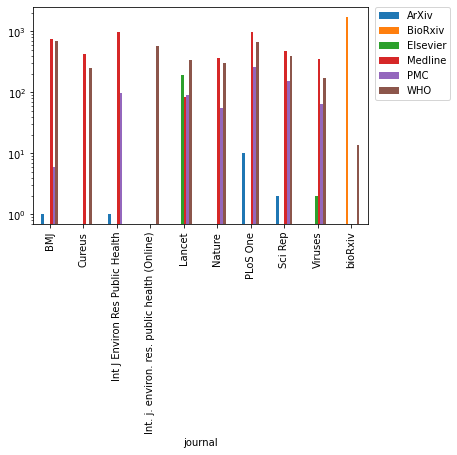

In [13]:
#Plot the top 10 in bar graph
plt.clf()
dfTopTen.groupby(['journal','1st Source']).size().unstack().plot(kind='bar', log=True)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


In [15]:
dfSample['abstract'].head()

563447    PURPOSE: Adequate patient allocation is pivota...
133534    Sake (Japanese rice wine) has been recognized ...
141039    After hypoxic brain injury, maintaining blood ...
454431    The COVID-19 disease caused by novel coronavir...
167444    1. A highly specific lateral flow test kit for...
Name: abstract, dtype: string

In [21]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_sci_lg

C:\ProgramData\Anaconda3\lib\site-packages\spacy\util.py:718: UserWarning: [W094] Model 'en_core_sci_lg' (0.2.4) specifies an under-constrained spaCy version requirement: >=2.2.1. This can lead to compatibility problems with older versions, or as new spaCy versions are released, because the model may say it's compatible when it's not. Consider changing the "spacy_version" in your meta.json to a version range, with a lower and upper pin. For example: >=3.0.7,<3.1.0
  warnings.warn(warn_msg)


In [22]:
import string

punctuations = string.punctuation
my_stopwords = list(STOP_WORDS)
my_stopwords[:10]

['six',
 'bottom',
 'because',
 'something',
 'without',
 'thus',
 'meanwhile',
 'still',
 'wherever',
 'very']

In [27]:
new_stopwords = ['doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure','rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 'al.', 'Elsevier', 'PMC', 'CZI' ]
for w in new_stopwords:
    if w not in my_stopwords:
        my_stopwords.append(w)

# my_stopwords = nltk.corpus.stopwords.words('english')
# my_stopwords.extend(new_stopwords)
# word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem




In [31]:
#Parser
parser = en_core_sci_lg.load(disable=["tagger", "ner"])
parser.max_length = 7000000

OSError: [E053] Could not read config.cfg from C:\ProgramData\Anaconda3\lib\site-packages\en_core_sci_lg\en_core_sci_lg-0.2.4\config.cfg

In [17]:

import re


#  def spacy_tokenizer(sentence):
#      mytokens = parser(sentence)
#      mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
#      mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
#      mytokens = " ".join([i for i in mytokens])
#      return mytokens


# cleaning master function
def clean_abstract(abstract, bigrams=False):
#     abstract = parser(sentence)
    abstract = re.sub('([0-9]+)', '', abstract) # remove numbers
    abstract = abstract.lower() # lower case
    abstract = re.sub('['+my_punctuation + ']+', ' ', abstract) # strip punctuation
    abstract = re.sub('\s+', ' ', abstract) #remove double spacing
    abstract_token_list = [word for word in abstract.split(' ')
                            if word not in my_stopwords] # remove stopwords

    if bigrams:
        abstract_token_list = abstract_token_list+[abstract_token_list[i]+'_'+abstract_token_list[i+1]
                                            for i in range(len(abstract_token_list)-1)]
    abstract = ' '.join(abstract_token_list)
    return abstract

In [18]:
#dfSample = dfSample.convert_dtypes()
dfSample.dtypes

cord_uid            string
sha                 string
source_x            string
title               string
doi                 string
pmcid               string
pubmed_id           object
license             string
abstract            string
publish_time        string
authors             string
journal             string
mag_id               Int64
who_covidence_id    string
arxiv_id            object
pdf_json_files      string
pmc_json_files      string
url                 string
s2_id                Int64
1st Source          string
other Sources       string
dtype: object

In [19]:
dfSample['clean_abstract'] = dfSample.abstract.apply(clean_abstract)


NameError: name 'my_punctuation' is not defined

In [31]:
dfSample.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,1st Source,other Sources
479900,qhsnwtvt,<NA>,WHO,COVID-19 and urology,<NA>,<NA>,NaN,unk,<NA>,2021,...,BJU Int,<NA>,#1129432,NaN,<NA>,<NA>,<NA>,231821908,WHO,<NA>
406050,5q49hktb,<NA>,WHO,Willingness to get the COVID-19 vaccine with a...,<NA>,<NA>,NaN,unk,BACKGROUND: This study assessed psychosocial p...,2020,...,Am. j. infect. control,<NA>,#1064717,NaN,<NA>,<NA>,<NA>,227060805,WHO,<NA>
428073,0k2ctsj0,<NA>,WHO,Constructing Well-Being in Organizations: Firs...,<NA>,<NA>,NaN,unk,The construct of job crafting is gaining incre...,2021,...,Int. j. environ. res. public health (Online),<NA>,#covidwho-1282491,NaN,<NA>,<NA>,<NA>,235715413,WHO,<NA>
463453,ulbzv4of,<NA>,WHO,Postscript,<NA>,<NA>,NaN,unk,<NA>,2021,...,Organists&#039; Review,<NA>,#covidwho-1242421,NaN,<NA>,<NA>,<NA>,220791482,WHO,<NA>
261175,n443eyg1,<NA>,WHO,Characteristics and Outcomes of 241 Births to ...,<NA>,<NA>,NaN,unk,OBJECTIVE: To describe the characteristics and...,2020,...,Obstet Gynecol,<NA>,#604288,NaN,<NA>,<NA>,<NA>,219914727,WHO,<NA>


In [32]:
# Generating bag of words features.
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(dfSample['clean_abstract'].values)
bow.shape

KeyError: 'clean_abstract'

In [96]:
bow

<196317x39 sparse matrix of type '<class 'numpy.int64'>'
	with 7656363 stored elements in Compressed Sparse Row format>

In [97]:
# to understand what kind of words generated as columns by BOW
terms = count_vect.get_feature_names()

In [100]:
#first 20 columns generated by BOW
terms[1:20]

['antecedent',
 'background',
 'case',
 'contact',
 'coronaviru',
 'covid',
 'dental',
 'diseas',
 'drug',
 'dtype',
 'emerg',
 'empyema',
 'evalu',
 'exc',
 'gener',
 'hazard',
 'hd',
 'import',
 'indian']

In [101]:
#using all processes jobs=-1 and k means++ for starting initilization advantage
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 15,init='k-means++', n_jobs = -1,random_state=99)
model.fit(bow)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-101-eb28c89c7c65>:4: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  model.fit(bow)


KMeans(n_clusters=15, n_jobs=-1, random_state=99)

In [102]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [104]:
cluster_center

array([[1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.,

In [ ]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')